In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Layer, Dropout


In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 100
CHANNEL = 3
EPOCH = 10

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/apple detection",
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 6407 files belonging to 13 classes.


In [ ]:
class_name = dataset.class_names
class_name

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2']

(32, 100, 100, 3)
[ 0  2  4  1 12  9  5  7  0 12  3  2  8 11  9 12  3  5  2  1  9  0  9  8
 11 12  3  7 12  8 12  8]


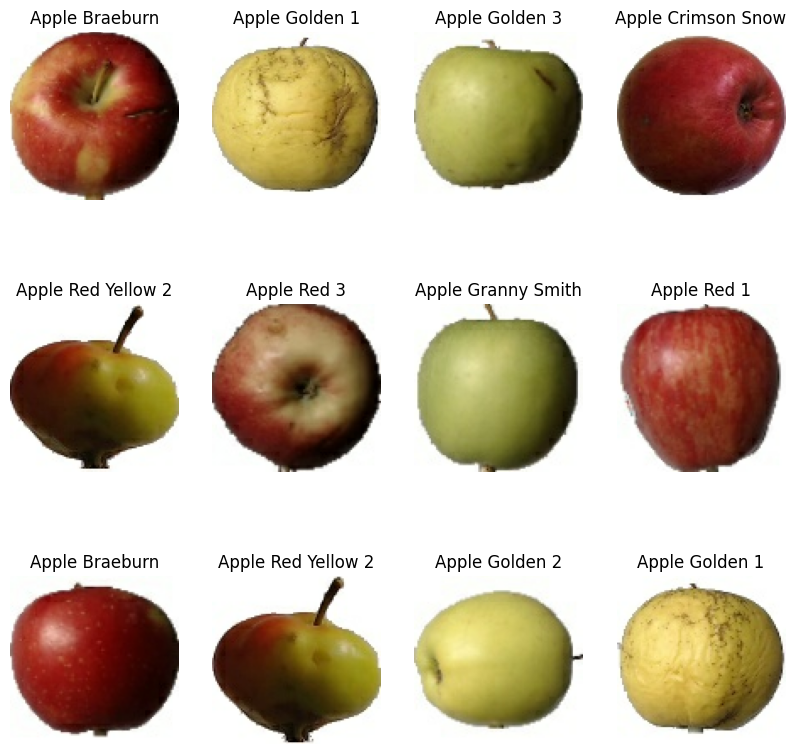

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [ ]:
def get_dataset_paritions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True,shuffle_size=10000):

    assert(train_split+test_split+val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split*ds_size)

    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)


    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds=get_dataset_paritions_tf(dataset)

In [ ]:
len(train_ds)

160

In [ ]:
len(test_ds)

21

In [ ]:
len(val_ds)

20

In [ ]:
from keras import layers
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
# Data Augmentation
data_augmention=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape=(BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE,CHANNEL)
n_classes = 13
model=Sequential([
    resize_and_rescale,
    data_augmention,
    layers.Conv2D(32, kernel_size=(3,3),activation="relu", input_shape = input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(n_classes, activation="softmax")

])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 100, 100, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 100, 100, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 98, 98, 32)          896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 49, 49, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 47, 47, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 23, 23, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCH
)

Epoch 1/10
160/160 [==============================] - 691s 56ms/step - loss: 1.3303 - accuracy: 0.5064 - val_loss: 0.8035 - val_accuracy: 0.6969
Epoch 2/10
160/160 [==============================] - 14s 54ms/step - loss: 0.5047 - accuracy: 0.8053 - val_loss: 0.3357 - val_accuracy: 0.8719
Epoch 3/10
160/160 [==============================] - 14s 47ms/step - loss: 0.2165 - accuracy: 0.9191 - val_loss: 0.3042 - val_accuracy: 0.8656
Epoch 4/10
160/160 [==============================] - 14s 54ms/step - loss: 0.1905 - accuracy: 0.9278 - val_loss: 0.0931 - val_accuracy: 0.9672
Epoch 5/10
160/160 [==============================] - 18s 79ms/step - loss: 0.1169 - accuracy: 0.9578 - val_loss: 0.0672 - val_accuracy: 0.9750
Epoch 6/10
160/160 [==============================] - 14s 48ms/step - loss: 0.0773 - accuracy: 0.9723 - val_loss: 0.0364 - val_accuracy: 0.9937
Epoch 7/10
160/160 [==============================] - 14s 51ms/step - loss: 0.1621 - accuracy: 0.9472 - val_loss: 0.0421 - val_accuracy

In [ ]:
score=model.evaluate(test_ds)

21/21 [==============================] - 8s 8ms/step - loss: 0.0931 - accuracy: 0.9583


In [ ]:
score

[0.0930875912308693, 0.9583333134651184]

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

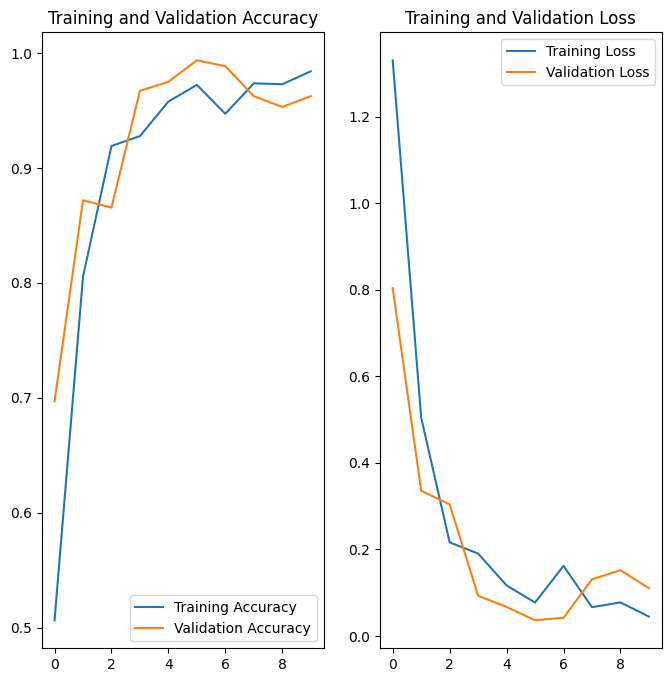

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCH), acc, label="Training Accuracy")
plt.plot(range(EPOCH), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCH), loss, label="Training Loss")
plt.plot(range(EPOCH), val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

first image to predict
actual label: Apple Braeburn
1/1 [==============================] - 0s 120ms/step
Predicted labels Apple Braeburn


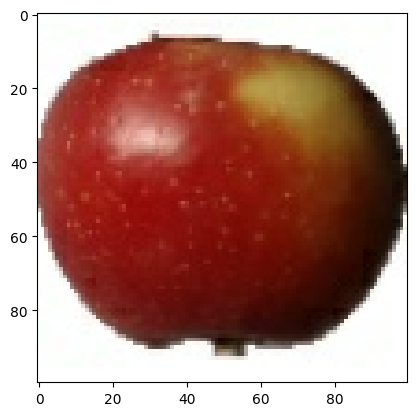

In [ ]:
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])

    batch_prediction = model.predict(images_batch)
    print("Predicted labels", class_name[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    prediction = model.predict(img_array)

    predicted_class = class_name[np.argmax(prediction[0])]
    confidence = round(100*(np.max(prediction[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 19ms/step


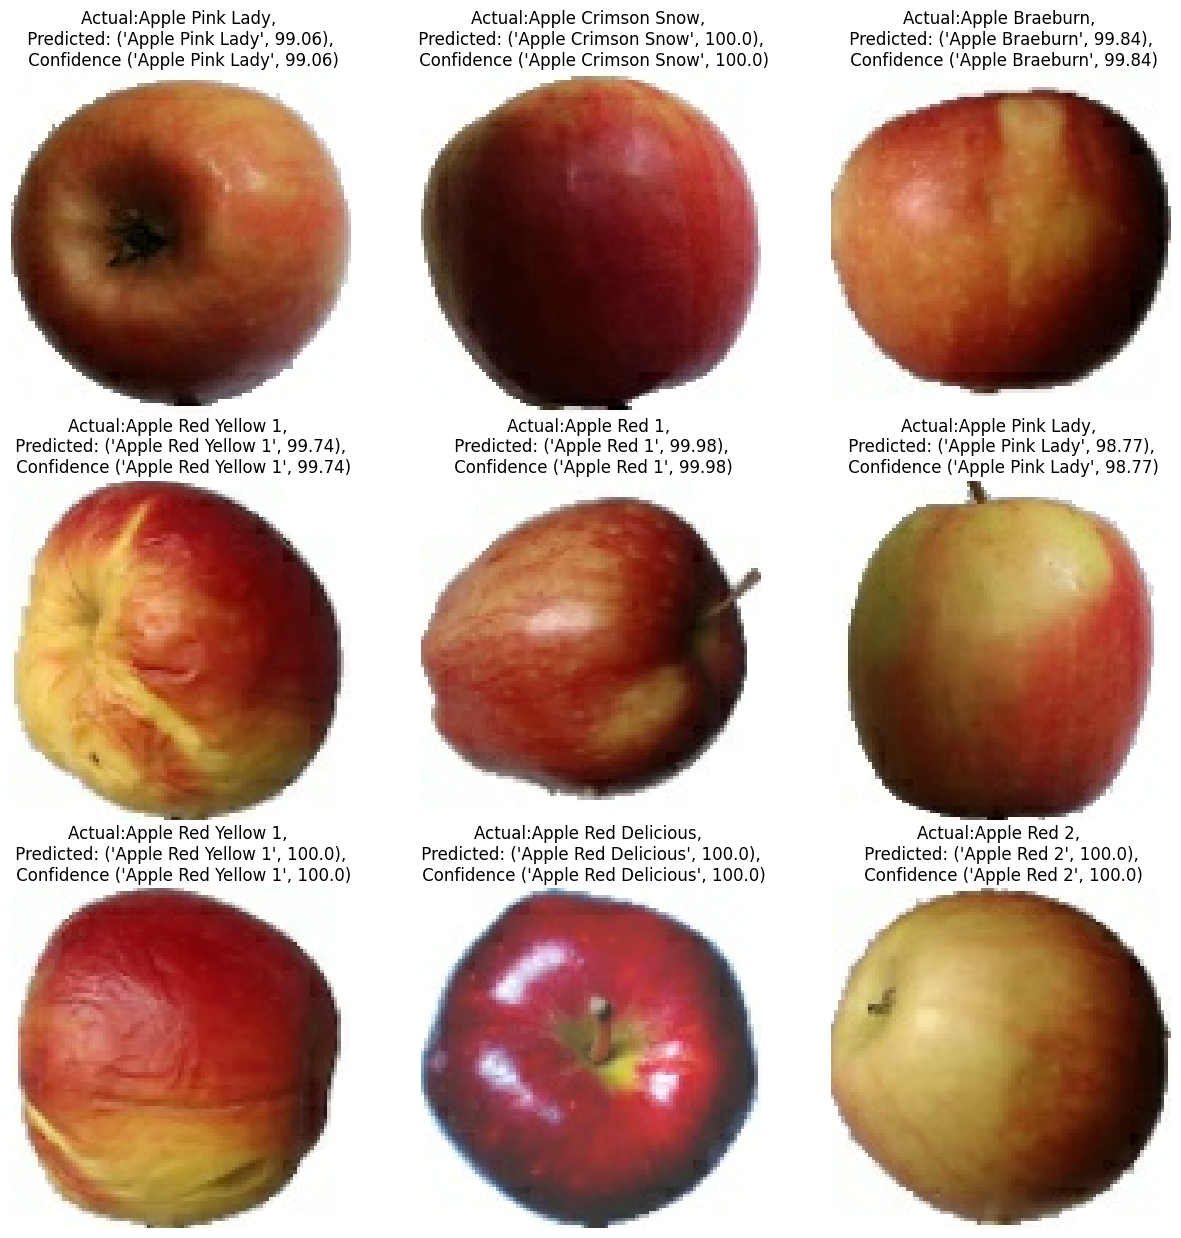

In [ ]:
plt.figure(figsize=(15,15))
for images, labels, in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class = confidence = predict(model, images[i].numpy())
        actual_class=class_name[labels[i]]

        plt.title(f"Actual:{actual_class}, \n Predicted: {predicted_class}, \n Confidence {confidence}")

        plt.axis("off")


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save("/content/drive/MyDrive/save model/model.hdf5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
